# Calculating a relativistic orbit under the Schwarzschild metric

In [5]:
from sympy import *
from sympy.tensor.tensor import TensorIndexType, TensorIndex, TensorHead, tensor_indices, tensor_heads
from sympy.tensor.toperators import PartialDerivative

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
init_printing()

In [6]:
x, y = symbols('x y')
f = x**2 + y**2
f

## Lets define the Schwartzchild metric function

In [7]:
t, r, phi, dt, dr, dphi, M, G  = symbols('t r phi dt dr dφ M G')
display((t, r, phi, dt, dr, dphi, M, G))
schild = ((1 - 2 * M * G)/r) * dt**2  - dr**2 * ((1 - 2 * M * G)/r)**-1 - r**2 * dphi**2
schild

## Equations of motion
Here we take these as read - from Paul Romatschke's slides.

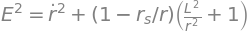

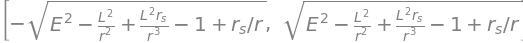

In [8]:
E, L, rs = symbols('E L r_s')
dr_dtor = Symbol('rdot')
eqn_motion = Eq(E**2, dr_dtor**2 + (1-rs/r) * (1 + L**2 / r**2))
display(eqn_motion)
dr_dtor_soln = solve(eqn_motion, dr_dtor)
dr_dtor_soln

In [5]:
dr_dtor_soln[1].subs({E:1, L:2, r:2, rs:1})

r0=20.00, L=4.851, E=0.9762
Min radius = 12.370


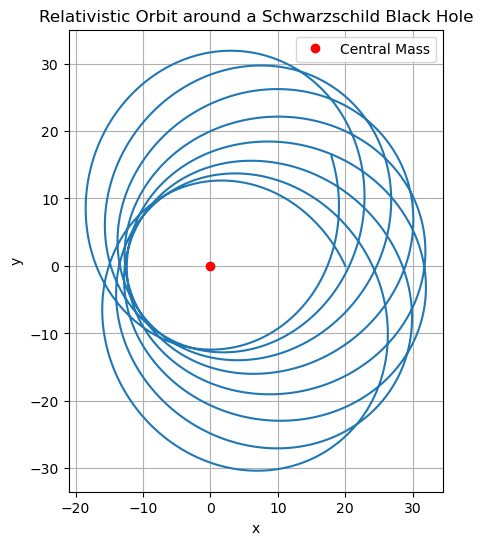

In [54]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 1  # Gravitational constant (in natural units)
M = 1  # Mass of the central object (e.g., black hole)
c = 1  # Speed of light (in natural units)
r_s = 2 * G * M  # Schwarzschild radius (2GM in natural units)

# Define the equations of motion for the Schwarzschild orbit

    
def equations_of_motion(t, y, E, L):
    r, phi, dr_dt, dphi_dt  = y

    rad_velocity_squared = E**2 - (1 - 2*G*M/r) * (c**2 + L**2 / r**2)
    # dr_dt = np.sqrt(rad_velocity_squared)
    dphi_dt = L/r**2
    
    # Schwarzschild factor
    # h = 1 - r_s / r
    
    # Radial acceleration in the Schwarzschild metric (corrected)
    # d2r_dt2 = -G * M / r**2 + (L**2 / r**3) * h  # Corrected sign for the relativistic correction
    d2r_dt2 = (1-r_s/r)*L**2/r**3 - (1-L**2/r**2) * r_s/(2 * r**2)
    
    # Correct angular acceleration
    d2phi_dt2 = -2 * L / r**3 * dr_dt

    # print(f"t={t:.3f}, r={r:.2f}, phi={phi:.3f}, dr_dt={dr_dt:.3f}, dphi_dt={dphi_dt:.3f}, d2r_dt2={d2r_dt2:.3f}, d2phi_dt2={d2phi_dt2:.3f}")

    return [dr_dt, dphi_dt, d2r_dt2, d2phi_dt2]

# Function to compute initial radial velocity (choosing correct branch)
def compute_initial_radial_velocity(E, L, r, sign):
    rad_velocity_squared = E**2 - (1 - 2*G*M/r) * (c**2 + L**2 / r**2)
    
    # Ensure rad_velocity_squared is positive (physically meaningful)
    if rad_velocity_squared < 0:
        # raise ValueError("Negative square root in radial velocity")
        rad_velocity_squared *= -1
    
    return sign * np.sqrt(rad_velocity_squared)

def calc_L_E_for_circular_orbit(r0):
    L = np.sqrt(M * r0**2 / (r0 - 3*M))
    E = np.sqrt ((1-2*M/r0) * (1 + M / (r0 -3*M)))
    print(f"r0={r0:.2f}, L={L:.3f}, E={E:.4f}")
    return L, E

# Check if the orbit gets too close to the Schwarzschild radius
def check_orbit_proximity(r_vals, rs):
    print(f"Min radius = {np.min(r_vals):.3f}")
    if np.min(r_vals) <= rs:
        print("Warning: Orbit gets too close to the Schwarzschild radius! Minimum radius =", np.min(r_vals))

# Parameters: Energy and angular momentum


# Initial conditions: [r, phi, dr/dtau, dphi/dtau]
r0 = 20.0    # Initial radius
L, E = calc_L_E_for_circular_orbit(r0)
L*=0.9
# L, E = 4, 0.97
phi0 = 0.0   # Initial angle
dr_sign = -1  # Positive sign means the particle is moving outward initially
dr0 = compute_initial_radial_velocity(E, L, r0, dr_sign)   # Initial radial velocity
dphi0 = L / r0**2  # From conservation of angular momentum

# Time span for the integration (proper time range)
tend=5000
tau_span = (0, tend)
y0 = [r0, phi0, dr0, dphi0]

# Solve the system of differential equations
solution = solve_ivp(equations_of_motion, tau_span, y0, args=(E, L), method='RK45', t_eval=np.linspace(0, tend, 10*tend))

# Extract results
r_vals = solution.y[0]
phi_vals = solution.y[1]

# Check if the orbit gets too close to the Schwarzschild radius
check_orbit_proximity(r_vals, r_s)

# Convert polar to Cartesian for plotting
x_vals = r_vals * np.cos(phi_vals)
y_vals = r_vals * np.sin(phi_vals)

# Plot the orbit
plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_vals)
plt.plot(0, 0, 'ro', label="Central Mass")
plt.title("Relativistic Orbit around a Schwarzschild Black Hole")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
